In [1]:
import numpy as np

# Python control toolbox: https://python-control.readthedocs.io/
from control import tf, bode, ss2tf, tf2ss, use_numpy_matrix
from control.matlab import impulse, step
use_numpy_matrix(False)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

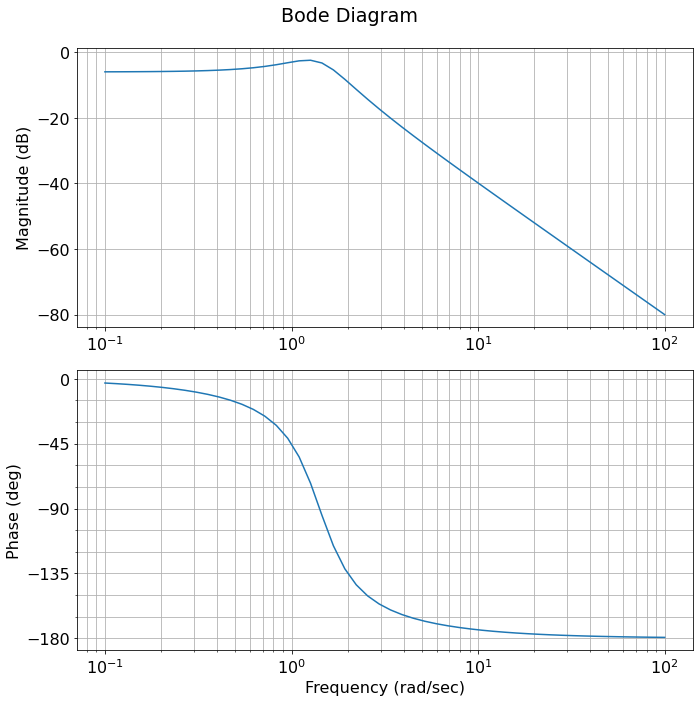

In [2]:
# Figure 18.23

# Laplace variable s
s = tf([1, 0], [0, 1])

# Transfer function
G = 1 / (s**2 + s + 2)

fig = plt.figure(figsize=(10, 10))

# Frequency response
w, mag, phase = bode(G, dB=True)

fig.suptitle('Bode Diagram')
plt.tight_layout();

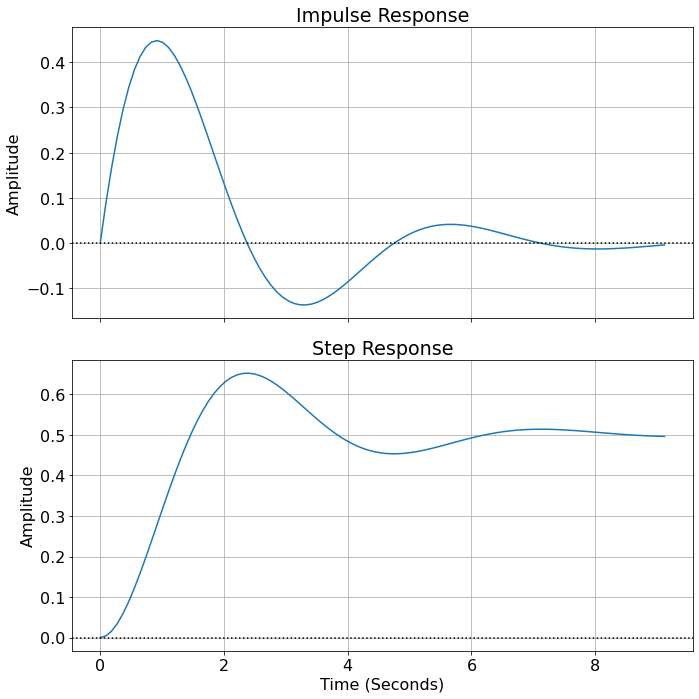

TransferFunction(array([1.]), array([1., 1., 2.]))

In [3]:
# Figures 18.24, 18.25

# State space definition

# System matrix
A = [[0,   1],
     [-2, -1]]
# Control matrix
B = [0, 1]
# Output matrix
C = [1, 0]
# Feedthrough matrix
D = 0

# State space to transfer function
G = ss2tf(A, B, C, D)

# Impulse and step responses from transfer function
y_i, t_i = impulse(G)
y_s, t_s = step(G)

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
axs[0].plot(t_i, y_i)
axs[0].axhline(0, linestyle=':', color='black')
axs[0].set_title('Impulse Response')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].plot(t_s, y_s)
axs[1].axhline(0, linestyle=':', color='black')
axs[1].set_title('Step Response')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Time (Seconds)')
axs[1].grid(True)
plt.tight_layout()
plt.show()
G